In [62]:
import csv
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [105]:
df_spo2 = pd.read_csv('spo2_data.csv')
df_bpm = pd.read_csv('bpm_data.csv')

In [106]:
spo2_aw = list(df_spo2['Apple Watch'])
spo2_sensor = list(df_spo2['MAX30102'])

In [107]:
bpm_aw = list(df_bpm['Apple Watch'])
bpm_sensor = list(df_bpm['MAX30102'])

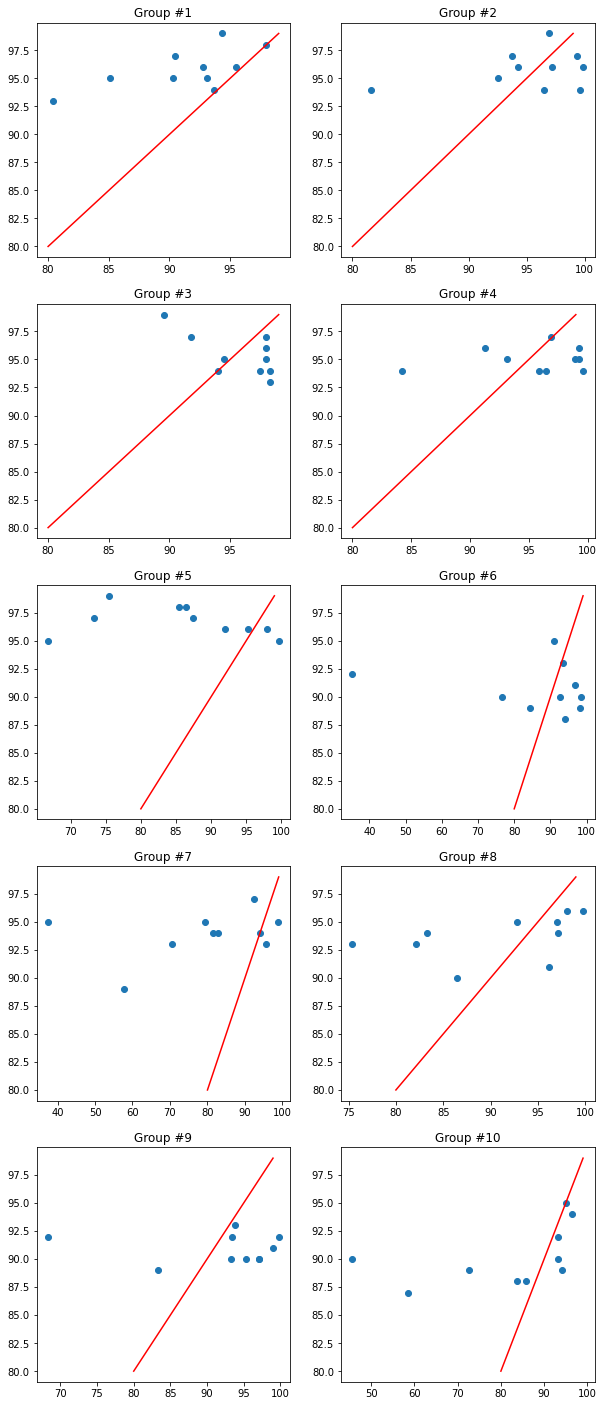

In [96]:
plt.rcParams["figure.figsize"] = (10,25)
fig, ax = plt.subplots(nrows=5, ncols=2)
count = 10
x = range(80,100)
y=x
for row in ax:
    for col in row:
        sen = spo2_sensor[count*10:count*10+10]
        aw = spo2_aw[count*10:count*10+10]
        col.scatter(sen,aw)
        col.plot(x,y,'r')
        count += 1
        col.title.set_text('Group #'+str(count-10))

plt.show()

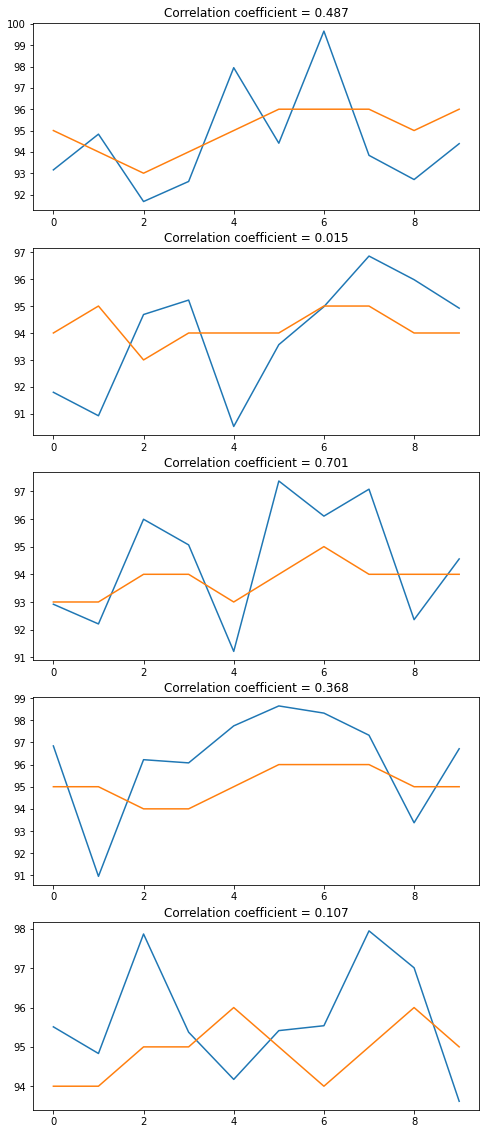

In [115]:
plt.rcParams["figure.figsize"] = (8,20)
fig, ax = plt.subplots(nrows=5)
count = 20
vari_sen = []
mean_sen = []
vari_aw = []
mean_aw = []
for row in ax:
    sen = spo2_sensor[count*10:count*10+10]
    aw = spo2_aw[count*10:count*10+10]
    r = np.corrcoef(sen,aw)
    rr = np.round(r[0,1],3)
    vari_sen.append(np.var(sen))
    mean_sen.append(np.mean(sen))
    vari_aw.append(np.var(aw))
    mean_aw.append(np.mean(aw))
    row.plot(sen)
    row.plot(aw)
    row.title.set_text('Correlation coefficient = '+str(rr))
    count += 1
        

vari_sen = np.asarray(vari_sen)
mean_sen = np.asarray(mean_sen)
vari_aw = np.asarray(vari_aw)
mean_aw = np.asarray(mean_aw)      

plt.show()

In [118]:
np.round(vari_aw,2)

array([1.  , 0.36, 0.36, 0.49, 0.49])

In [104]:
np.round(np.abs(mean_aw-mean_sen)/mean_aw*100,2)

array([0.26, 1.06, 0.92, 0.76, 0.57, 0.59, 0.4 , 1.04, 6.17])